In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from finrl.plot import backtest_stats, get_baseline
from finrl.config_tickers import DOW_30_TICKER, SSE_50_TICKER, HSI_50_TICKER, DAX_30_TICKER
from finrl.config import TRAINED_MODEL_DIR, RESULTS_DIR, INDICATORS



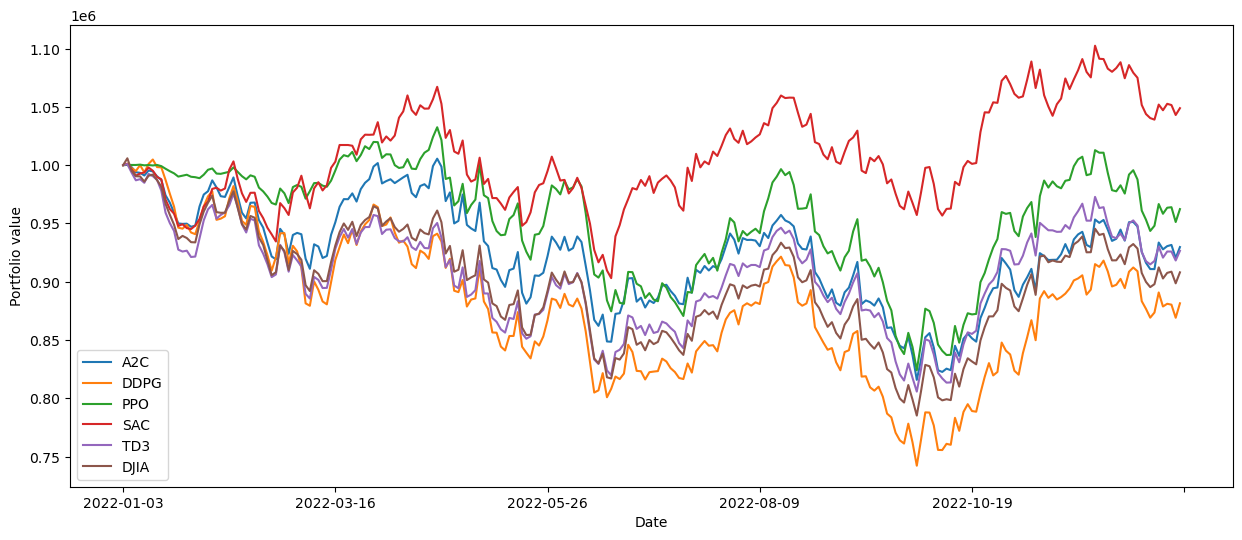

In [39]:
DATA_NAME = 'DJIA'
RISK = 'turbulence80'
%matplotlib inline
df1 = pd.read_csv('results_{}/a2c/df_account_value_{}'.format(DATA_NAME,RISK),index_col=0)
df2 = pd.read_csv('results_{}/ddpg/df_account_value_{}'.format(DATA_NAME,RISK),index_col=0)
df3 = pd.read_csv('results_{}/ppo/df_account_value_{}'.format(DATA_NAME,RISK),index_col=0)
df4 = pd.read_csv('results_{}/sac/df_account_value_{}'.format(DATA_NAME,RISK),index_col=0)
df5 = pd.read_csv('results_{}/td3/df_account_value_{}'.format(DATA_NAME,RISK),index_col=0)
df6 = pd.read_csv('results_{}/df_{}.csv'.format(DATA_NAME,DATA_NAME),index_col=0)

plt.rcParams["figure.figsize"] = (15,6)
df = pd.concat([df1,df2,df3,df4,df5,df6],axis=1)
df.columns=['A2C','DDPG','PPO','SAC','TD3', DATA_NAME]
fig = df.plot()
fig.set_xlabel('Date')
fig.set_ylabel('Portfolio value')
plt.legend()
fig.get_figure().savefig('results_{}/{}_{}.png'.format(DATA_NAME, DATA_NAME,RISK))

In [40]:
df1 = pd.read_csv('results_{}/a2c/df_account_value_{}'.format(DATA_NAME,RISK))
df2 = pd.read_csv('results_{}/ddpg/df_account_value_{}'.format(DATA_NAME,RISK))
df3 = pd.read_csv('results_{}/ppo/df_account_value_{}'.format(DATA_NAME,RISK))
df4 = pd.read_csv('results_{}/sac/df_account_value_{}'.format(DATA_NAME,RISK))
df5 = pd.read_csv('results_{}/td3/df_account_value_{}'.format(DATA_NAME,RISK))
df6 = pd.read_csv('results_{}/df_{}.csv'.format(DATA_NAME,DATA_NAME))
df = pd.concat([pd.DataFrame(backtest_stats(account_value=df1)),pd.DataFrame(backtest_stats(account_value=df2)),
                pd.DataFrame(backtest_stats(account_value=df3)),pd.DataFrame(backtest_stats(account_value=df4)),
                pd.DataFrame(backtest_stats(account_value=df5)),pd.DataFrame(backtest_stats(account_value=df6))],axis=1)

df = df.drop(['Skew', 'Kurtosis'])
df.columns=['A2C','DDPG','PPO','SAC','TD3', DATA_NAME]
df.to_csv('results_{}/perf_{}.csv'.format(DATA_NAME,RISK), float_format='%.3f')
df

d:\Anaconda\envs\fin\lib\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
d:\Anaconda\envs\fin\lib\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
d:\Anaconda\envs\fin\lib\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
d:\Anaconda\envs\fin\lib\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
d:\A

,A2C,DDPG,PPO,SAC,TD3,DJIA
Annual return,-0.070815,-0.119409,-0.038007,0.049260,-0.074062,-0.092658
Cumulative returns,-0.070273,-0.118519,-0.037711,0.048860,-0.073496,-0.091957
Annual volatility,0.202847,0.226566,0.200220,0.182777,0.198517,0.198893
Sharpe ratio,-0.262300,-0.450365,-0.094518,0.355107,-0.290240,-0.391614
Calmar ratio,-0.375246,-0.456750,-0.188262,0.320324,-0.379874,-0.422307
Stability,0.295876,0.360944,0.170008,0.313866,0.064831,0.241091
Max drawdown,-0.188716,-0.261431,-0.201882,-0.153782,-0.194965,-0.219408
Omega ratio,0.957078,0.929266,0.983727,1.059510,0.953235,0.937692
Sortino ratio,-0.363283,-0.620052,-0.132988,0.515663,-0.410176,-0.545261
Tail ratio,0.999507,0.876217,0.867676,1.030830,0.987548,1.014944
